# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Removing-outliers-z-score->-3" data-toc-modified-id="Removing-outliers-z-score->-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Removing outliers z-score &gt; 3</a></div><div class="lev1 toc-item"><a href="#Removing-Outliers-using-IQR" data-toc-modified-id="Removing-Outliers-using-IQR-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Removing Outliers using IQR</a></div><div class="lev1 toc-item"><a href="#Using-sklearn-DBSCAN" data-toc-modified-id="Using-sklearn-DBSCAN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using sklearn DBSCAN</a></div><div class="lev1 toc-item"><a href="#statsmodels-test:-OLSResults.outlier_test" data-toc-modified-id="statsmodels-test:-OLSResults.outlier_test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>statsmodels test: OLSResults.outlier_test</a></div><div class="lev2 toc-item"><a href="#Simple-Example-statsmodels-outliers_test" data-toc-modified-id="Simple-Example-statsmodels-outliers_test-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simple Example statsmodels outliers_test</a></div><div class="lev2 toc-item"><a href="#Example-2" data-toc-modified-id="Example-2-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Example 2</a></div>

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris

pd.set_option('display.max_columns', 500)

In [2]:
#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Create dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df_o = boston_df
print(boston_df.shape)

boston_df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


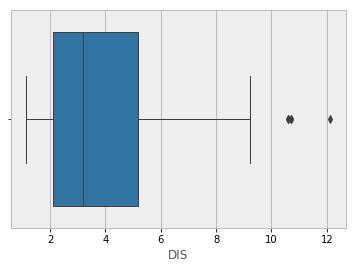

In [6]:
#Oulier detection - Univarite - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['DIS'])

# three points looks like to be outliers.

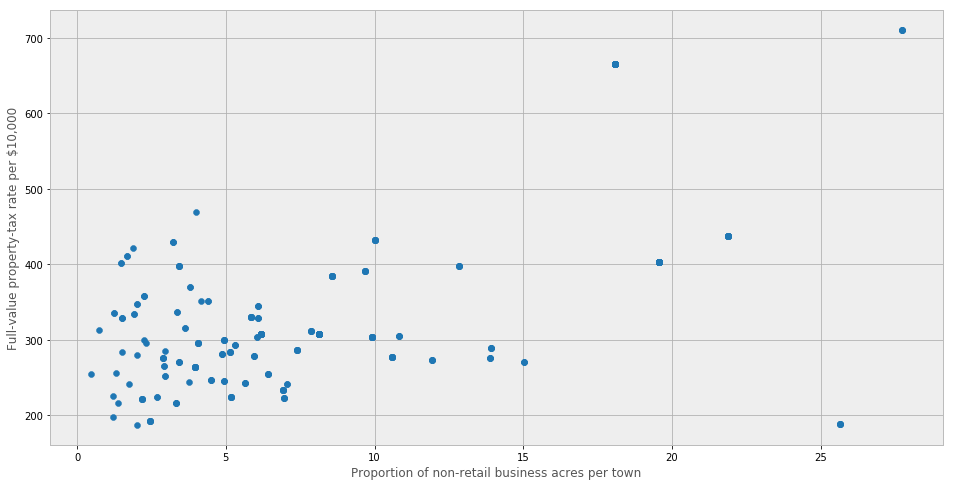

In [7]:
#scatterplot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

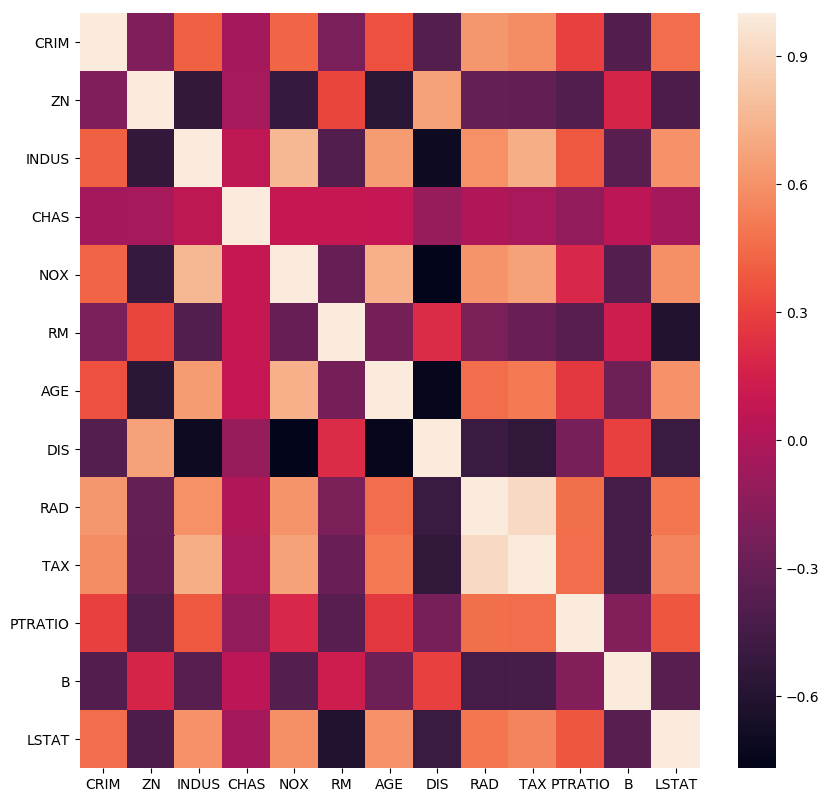

In [8]:
#Check the correlation between features before multivariate outlier analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(boston_df.corr())

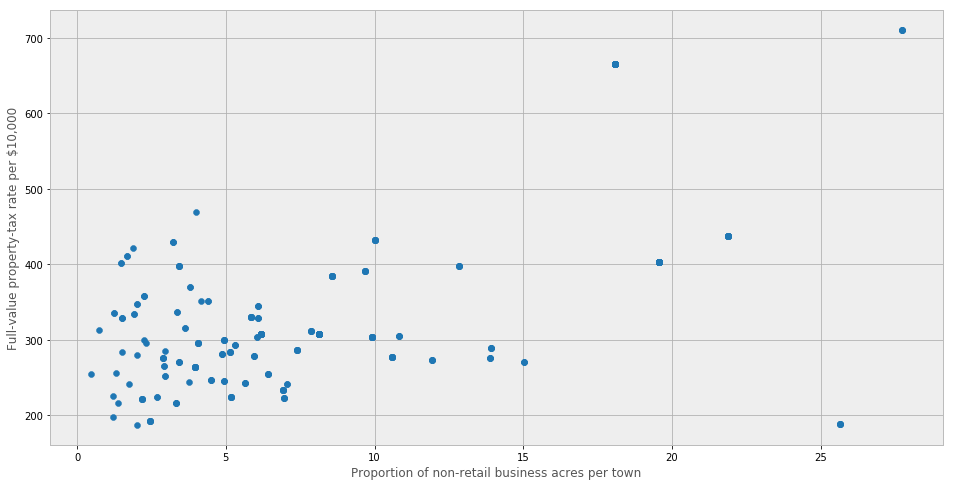

In [9]:
#Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

# Removing outliers z-score > 3

In [10]:
from scipy import stats
import numpy as np

In [11]:
print(boston_df.shape)
boston_df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
z = np.abs(stats.zscore(boston_df))
z.shape

(506, 13)

In [13]:
threshold = 3
z_3 = np.where(z>3)

print(np.where(z > 3))

i = 0
z_3[0][i],  z_3[1][i],  z[z_3[0][i]][z_3[1][i]], z_3[0].shape

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

(55, 1, 3.375038763517309, (100,))

In [14]:
first = z_3[0][0]
boston_df.iloc[[first]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81


In [15]:
z[first,:] # we can see value greater than 3 here.

array([0.41899176, 3.37503876, 1.44695069, 0.27259857, 1.31039199,
       1.37389184, 1.65978618, 2.33004908, 0.52300145, 1.08235801,
       0.2568579 , 0.4304165 , 1.09939185])

In [16]:
temp = boston_df.iloc[[first]].copy()
temp.loc[1] = z[first,:]
temp.loc[2] = range(len(z[first,:]))
temp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.013110,90.000000,1.220000,0.000000,0.403000,7.249000,21.900000,8.696600,5.000000,226.000000,17.900000,395.930000,4.810000
1,0.418992,3.375039,1.446951,0.272599,1.310392,1.373892,1.659786,2.330049,0.523001,1.082358,0.256858,0.430417,1.099392
2,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [17]:
boston_df_no_outliers = boston_df[(np.abs(stats.zscore(boston_df)) < 3).all(axis=1)]


'''
- For each column, first it computes the Z-score of each value in the column,
relative to the column mean and standard deviation.

- Then is takes the absolute of Z-score because the direction does not matter,
only threshold matters.

- all(axis=1) ensures that for each row, all column satisfy the constraint.

''';

boston_df.shape, boston_df_no_outliers.shape

((506, 13), (415, 13))

In [18]:
# checking
boston_df_no_outliers.iloc[first-1:first+2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22


In [19]:
idx1 = boston_df.index.values
# idx1

In [20]:
idx2 = boston_df_no_outliers.index.values
# idx2

In [21]:
missing = [i for i in idx1 if i not in idx2]
print(missing, len(missing))

[55, 56, 57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199, 200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276, 277, 282, 283, 284, 347, 351, 352, 353, 354, 355, 356, 357, 358, 363, 364, 365, 367, 369, 370, 372, 373, 374, 380, 398, 404, 405, 406, 410, 411, 412, 414, 415, 416, 418, 419, 423, 424, 425, 426, 427, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466] 91


In [22]:
print(z_3[0], len(z_3[0]))

[ 55  56  57 102 141 142 152 154 155 160 162 163 199 200 201 202 203 204
 208 209 210 211 212 216 218 219 220 221 222 225 234 236 256 257 262 269
 273 274 276 277 282 283 283 284 347 351 352 353 353 354 355 356 357 358
 363 364 364 365 367 369 370 372 373 374 374 380 398 404 405 406 410 410
 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429 431
 436 437 438 445 450 454 455 456 457 466] 100


In [23]:
missing_not_in_z3 = [i for i in z_3[0] if i not in missing]
missing_not_in_z3

[]

In [24]:
# there are some values repeating in z_3 eg. 414
repeated = set([i for i in z_3[0] if z_3[0].tolist().count(i) > 1])

repeated

{283, 353, 364, 374, 410, 412, 414, 418, 427}

In [25]:
pd.Series(z_3[0])[pd.Series(z_3[0]).duplicated()].values

array([283, 353, 364, 374, 410, 412, 414, 418, 427])

# Removing Outliers using IQR

In [26]:
boston_df.shape

(506, 13)

In [27]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [29]:
cond1 = (boston_df < (Q1 - 1.5 * IQR))
cond2 = (boston_df > (Q3 + 1.5 * IQR))
cond = cond1 | cond2
boston_df_no_outliers_iqr = boston_df[~(cond).any(axis=1)]

boston_df_no_outliers_iqr.shape

(274, 13)

In [30]:
boston_df_no_outliers_iqr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
np.setdiff1d(boston_df.index.values, boston_df_no_outliers.index.values)

array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 284, 347, 351, 352, 353, 354, 355, 356, 357, 358,
       363, 364, 365, 367, 369, 370, 372, 373, 374, 380, 398, 404, 405,
       406, 410, 411, 412, 414, 415, 416, 418, 419, 423, 424, 425, 426,
       427, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466])

In [32]:
np.setdiff1d(boston_df.index.values, boston_df_no_outliers_iqr.index.values)

array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
        97,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152, 153, 154,
       155, 156, 160, 162, 163, 165, 166, 167, 168, 169, 170, 180, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 224, 225, 226, 232, 233, 234, 236, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 273, 274, 275, 276, 277, 278, 280, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 331, 332, 341, 343, 344, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 363, 364, 365, 366, 367, 369,
       370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
       384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 41

# Using sklearn DBSCAN

DBSCAN is going to assign points to clusters and return the labels of clusters. If it cannot assign the value to any cluster (because it is an outlier), it returns -1. In this example, it may also return a cluster which contains only two points, but for the sake of demonstration I want -1 so I set the minimal number of samples in a cluster to 3.

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
df = boston_df[['AGE','CRIM']]
df.head()

,AGE,CRIM
0,65.2,0.00632
1,78.9,0.02731
2,61.1,0.02729
3,45.8,0.03237
4,54.2,0.06905


In [36]:
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)

clusters = outlier_detection.fit_predict(df)

clusters

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8, -1,  9, 38,  1, -1, -1, -1,
       46, -1, -1, 10, 11, -1,  7, 12, -1, 31, 11, 12, -1, 12,  7, -1, 12,
       10, 13,  1, 14, -1, 15, 41, -1, 16, 16, 17, 18, 18,  8,  6,  1,  2,
       -1, 15, 15, 19, 15, 20, 17, 21, 19,  5, 22, 13, -1,  4, 23, 24, 15,
       25, 18, 16, 23, -1, 16, 16,  2, 26,  2,  3, 25, 18, 27, 24, -1, 19,
       28,  2, 28,  8, -1,  5, 26,  3, 21, 47,  4, -1, -1, 25,  1, 29, 30,
        8,  8, 31, 32, 33,  8, 32, 33,  3, 46, 33,  6, 34, 35, 26,  9, 26,
        0, -1, 34, 33, 32,  6, 35,  6,  6, 10, 12, 10, 10, 10,  6, 10, 10,
       22, 10, 10, 10, 22,  7, -1, -1, -1, -1, -1, 36, -1, -1, 10,  7, -1,
       -1, -1, -1, -1, 10,  7,  7, -1, -1, -1, 12, -1, -1, 36, -1, 36, -1,
       12, -1, 35, 34, 37, 18, 19, 26, 26,  4,  9,  1, 33,  6, 31, 37,  3,
       14, 21, 38, 15, 24, -1, 39, 40, 24, 18, 25, 38, 41, -1, 38, 41, 18,
       24, 15, 42, 26,  4,  7, 33, 35,  3, 24, 39, 43, 28,  8, 22, 33, 35,
       33, 47, -1, -1,  9

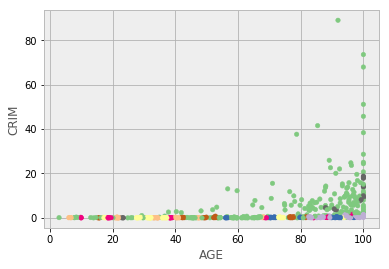

In [37]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')

df.plot.scatter(
  x = "AGE",
  y = "CRIM",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

In [38]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

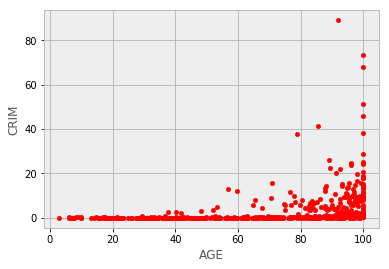

In [39]:
boston_df.plot.scatter(x='AGE',y='CRIM')

# statsmodels test: OLSResults.outlier_test

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html


**Bonferrni Outliers Correction:  

https://www.wikiwand.com/en/Bonferroni_correction

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as smg

In [41]:
#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

In [42]:
regression = smf.ols("data ~ x", data=dict(data=y, x=x)).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 23 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        11:22:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
x[0]          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x[1]           0.0464      0.014      3.382      0.001       0.019       0.073
x[2]           0.0206      0.061      0.334      0.738      -0.100       0.141
x[3]           2.6867      0.862      3.118      0.002       0.994       4.380
x[4]         -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x[5]           3.8099      0.418      9.116      0.000       2.989       4.631
x[6]           0.0007      0.013      0.052      0.958      -0.025       0.027
x[7]          -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x[8]           0.3060      0.066      4.613      0.000       0.176       0.436
x[9]          -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x[10]         -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x[11]          0.0093      0.003      3.467      0.001       0.004       0.015
x[12]         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Find outliers 
# Bonferroni outlier test #
test = regression.outlier_test()
test.head()

,student_resid,unadj_p,bonf(p)
0,-1.276881,0.202248,1.0
1,-0.725580,0.468442,1.0
2,0.875828,0.381552,1.0
3,1.018104,0.309130,1.0
4,1.757836,0.079399,1.0


In [44]:
print('Bad data points (bonf(p) < 0.05):')
print(test[test['bonf(p)'] < 0.05])

Bad data points (bonf(p) < 0.05):
     student_resid       unadj_p   bonf(p)
368       5.907411  6.499754e-09  0.000003
371       5.491079  6.418513e-08  0.000032
372       5.322247  1.561670e-07  0.000079


## Simple Example statsmodels outliers_test

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as smg

In [46]:
x = np.arange(30, dtype=float)
y = x*(10. + 2.4*np.random.randn(30)) + 200
x[6] = 15.
y[6] = 210.

In [47]:
regression = smf.ols("data ~ x", data=dict(data=y, x=x)).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.09e-11
Time:                        11:22:38   Log-Likelihood:                -157.15
No. Observations:                  30   AIC:                             318.3
Df Residuals:                      28   BIC:                             321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    186.2251     17.277     10.779      0.000     150.834     221.616
x             11.1493      1.012     11.017      0.000       9.076      13.222
==============================================================================
Omnibus:                       10.546   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.486
Skew:                          -1.089   Prob(JB):                      0.00871
Kurtosis:                       4.686   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Find outliers 
# Bonferroni outlier test #
test = regression.outlier_test()
test.head()

,student_resid,unadj_p,bonf(p)
0,0.308706,0.759915,1.0
1,0.377360,0.708856,1.0
2,0.211865,0.833804,1.0
3,0.248732,0.805451,1.0
4,0.301510,0.765336,1.0


In [49]:
print('Bad data points (bonf(p) < 0.05):')
print(test[test['bonf(p)'] < 0.05])

Bad data points (bonf(p) < 0.05):
   student_resid   unadj_p   bonf(p)
6      -3.743906  0.000868  0.026037


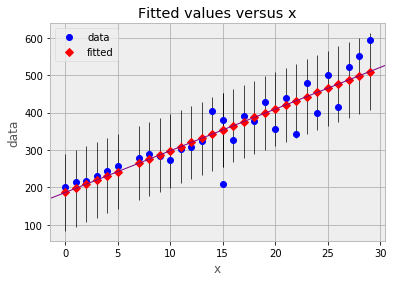

In [50]:
figure = smg.regressionplots.plot_fit(regression, 1)
line = smg.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])

## Example 2

Outliers:  [(15, 220)]


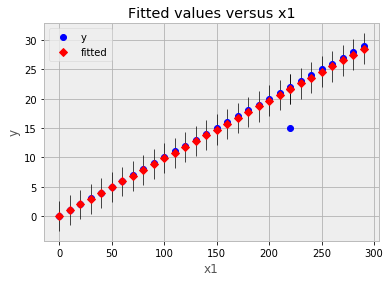

In [51]:
import statsmodels.api as sm
import statsmodels.graphics as smg

# Make data #
x = list(range(30))
y = [i*10 for i in x]

# Add outlier #
x.insert(6,15)
y.insert(6,220)

# Make graph #
regression = sm.OLS(x, y).fit()
figure = smg.regressionplots.plot_fit(regression, 0)

# Find outliers #
test = regression.outlier_test()
outliers = ((x[i],y[i]) for i,t in enumerate(test) if t[2] < 0.5)
print('Outliers: ', list(outliers))

In [52]:
pd.DataFrame([x,y]).style.apply(lambda x: ['background: red' if x.name == 6 else '' for i in x])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0,1,2,3,4,5,15,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
1,0,10,20,30,40,50,220,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290


In [53]:
# from random import random
# import statsmodels.api as smapi
# from statsmodels.formula.api import ols
# import statsmodels.graphics as smgraphics

# # Make data #
# x = list(range(30))
# y = [y*(10+random())+200 for y in x]

# # Add outlier #
# x.insert(6,15)
# y.insert(6,220)

# # Make fit #
# regression = ols("data ~ x", data=dict(data=y, x=x)).fit()

# # Find outliers #
# test = regression.outlier_test()
# outliers = ((x[i],y[i]) for i,t in enumerate(test.icol(2)) if t < 0.5)
# print('Outliers: ', list(outliers))

# # Figure #
# figure = smgraphics.regressionplots.plot_fit(regression, 1)

# # Add line #
# smgraphics.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])
# this gives icol not found error